## Object Detection

In [106]:
!pip install pillow
!pip install lxml
!pip install Cython
!pip install jupyter
!pip install matplotlib
!pip install pandas
!pip install opencv-python
!pip install opencv-contrib-python
!pip install tensorflow==1.14.0
!pip install protobuf

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import os
import numpy as np
import sys
import tarfile
from PIL import Image
import six.moves.urllib as urllib
from matplotlib import pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import ops as utils_ops
from object_detection.utils import visualization_utils as vis_util
%matplotlib inline

/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

Getting models folder from TensorFlow github into our local directory

In [2]:
#cloning object detection models from tensorflow github
!git clone https://github.com/tensorflow/models/
%cd ./models/research/object_detection

fatal: destination path 'models' already exists and is not an empty directory.
/home/hannah/Software/python/models/research/object_detection


Move train and validation images into ./models/research/object_detection/images/train and ./models/research/object_detection/images/val

Can do this by: creating new directories by uncommenting the last 2 lines below and adding images one by one OR dragging train and validation image folders into this directory manually (outside jupyter notebook)

In [3]:
#making training, inference_graph, train image, and test image directories
!mkdir training
!mkdir inference_graph
# !mkdir -p images/train
# !mkdir -p images/val

mkdir: cannot create directory ‘training’: File exists
mkdir: cannot create directory ‘inference_graph’: File exists


Downloading SSD MobileNet V2 Model from TensorFlow

In [4]:
#wget = get from the web
#tar -xvzf = x – extract the archive, z – using gzip compression, v – verbal, displaying information about the archive while archiving, f – using an archive file
#rm -rf = remove file
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xvzf ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!rm -rf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

--2020-01-25 23:15:53--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.1.144, 2607:f8b0:4000:815::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.1.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M  23.0MB/s    in 8.0s    

2020-01-25 23:16:01 (22.4 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03_29/saved_mod

Setting environmental variables

In [5]:
#import operating system library
#setting environmental variables (variables that can be applied to multiple applications/processes in Linux)
os.environ['PATH'] = "{0}{1}/models:{1}/models/research:{1}/models/research/slim".format(os.environ['PATH'], os.getcwd())

In [6]:
%cd ..
!protoc ./object_detection/protos/*.proto --python_out=.

/home/hannah/Software/python/models/research


In [7]:
!python3 setup.py build
!python3 setup.py install

running build
running build_py
copying object_detection/my_inference_graph.py -> build/lib/object_detection
copying object_detection/protos/losses_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/hyperparams_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/preprocessor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/optimizer_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/keypoint_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/train_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/image_resizer_pb2.py -> build/lib/object_detection/protos
c

In [29]:
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v2_coco_2018_03_29'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

## Convert images to .xml file

In [10]:
import glob
import pandas as pd
import xml.etree.ElementTree as ET

#function to convert xml file to csv
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [11]:
for folder in ['new train xml', 'new val xml']:
    image_path = os.path.join(os.getcwd(), (folder))
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv((str(folder) + '_labels.csv'), index=None)
    print('Successfully converted xml to csv.')

Successfully converted xml to csv.
Successfully converted xml to csv.


In [12]:
traindf = pd.read_csv(os.path.join(os.getcwd(), 'new train xml_labels.csv'))
valdf = pd.read_csv(os.path.join(os.getcwd(), 'new val xml_labels.csv'))

In [13]:
traindf['class'].value_counts()

stop                  23
oneWay                20
speedLimit35          18
speedLimit30          15
yield                 15
laneEnds              14
speedLimit50          12
doNotEnter            12
curveLeft             12
dip                   11
speedLimit45          11
speedLimit15          10
speedLimit70          10
keepRight              9
pedestrianCrossing     4
doNotPass              3
noLeftTurn             3
rightLaneMustTurn      2
slow                   1
noUTurn                1
curveRight             1
roundabout             1
addedLane              1
speedLimit25           1
leftLaneMustTurn       1
Name: class, dtype: int64

In [14]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import


import io
from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

# #update this for each class label in your dataset
def class_text_to_int(row_label):
    if row_label == 'stop':
        return 1
    elif row_label == 'pedestrianCrossing':
        return 2
    elif row_label == 'oneWay':
        return 3
    elif row_label == 'rightLaneMustTurn':
        return 4
    elif row_label == 'speedLimit35':
        return 5
    elif row_label == 'speedLimit30':
        return 6
    elif row_label == 'doNotEnter':
        return 7
    elif row_label == 'keepRight':
        return 8
    elif row_label == 'laneEnds':
        return 9
    elif row_label == 'speedLimit45':
        return 10
    elif row_label == 'yield':
        return 11
    elif row_label == 'curveLeft':
        return 12
    elif row_label == 'speedLimit50':
        return 13
    elif row_label == 'doNotPass':
        return 14
    elif row_label == 'noRightTurn':
        return 15
    elif row_label == 'noLeftTurn':
        return 16
    elif row_label == 'noUTurn':
        return 17
    elif row_label == 'dip':
        return 18
    elif row_label == 'speedLimit70':
        return 19
    elif row_label == 'roundabout':
        return 20
    elif row_label == 'speedLimit15':
        return 21
    elif row_label == 'speedLimit40':
        return 22
    elif row_label == 'leftLaneMustTurn':
        return 23
    elif row_label == 'signalAhead':
        return 24
    elif row_label == 'addedLane':
        return 25
    elif row_label == 'curveRight':
        return 26
    elif row_label == 'speedLimit55':
        return 27
    elif row_label == 'merge':
        return 28
    elif row_label == 'keepLeft':
        return 29
    elif row_label == 'slow':
        return 30
    elif row_label == 'speedLimit65':
        return 31
    elif row_label == 'uTurn':
        return 32
    elif row_label == 'stopAhead':
        return 33
    elif row_label == 'speedLimit25':
        return 34
    elif row_label == 'intersection':
        return 35
    elif row_label == 'curvyRoad':
        return 36
    elif row_label == 'leftTurn':
        return 37
    elif row_label == 'rightTurn':
        return 38
    elif row_label == 'speedLimit60':
        return 39
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))
        
    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    
    return tf_example


def main():
    for item in ['new val', 'new train']:
      output_path = "{}.record".format(item)
      writer = tf.python_io.TFRecordWriter(output_path)
      path = os.path.join(os.getcwd(), "object_detection/images/{}".format(item))
      examples = pd.read_csv("{} xml_labels.csv".format(item))
      grouped = split(examples, 'filename')
      for group in grouped:
          tf_example = create_tf_example(group, path)
          writer.write(tf_example.SerializeToString())

      writer.close()
      output_path = os.path.join(os.getcwd(), output_path)
      print('Successfully created the TFRecords: {}'.format(output_path))

main()

Successfully created the TFRecords: /home/hannah/Software/python/models/research/new val.record
Successfully created the TFRecords: /home/hannah/Software/python/models/research/new train.record


In [15]:
%%writefile ./object_detection/training/labelmap.pbtxt
item {
  id: 1
  name: 'stop'
}

item {
  id: 2
  name: 'pedestrianCrossing'
}

item {
  id: 3
  name: 'oneWay'
}

item {
  id: 4
  name: 'rightLaneMustTurn'
}

item {
  id: 5
  name: 'speedLimit35'
}

item {
  id: 6
  name: 'speedLimit30'
}

item {
  id: 7
  name: 'doNotEnter'
}

item {
  id: 8
  name: 'keepRight'
}

item {
  id: 9
  name: 'laneEnds'
}

item {
  id: 10
  name: 'speedLimit45'
}

item {
  id: 11
  name: 'yield'
}

item {
  id: 12
  name: 'curveLeft'
}

item {
  id: 13
  name: 'speedLimit50'
}

item {
  id: 14
  name: 'doNotPass'
}

item {
  id: 15
  name: 'noRightTurn'
}

item {
  id: 16
  name: 'noLeftTurn'
}

item {
  id: 17
  name: 'noUTurn'
}

item {
  id: 18
  name: 'dip'
}

item {
  id: 19
  name: 'speedLimit70'
}

item {
  id: 20
  name: 'roundabout'
}

item {
  id: 21
  name: 'speedLimit15'
}

item {
  id: 22
  name: 'speedLimit40'
}

item {
  id: 23
  name: 'leftLaneMustTurn'
}

item {
  id: 24
  name: 'signalAhead'
}

item {
  id: 25
  name: 'addedLane'
}

item {
  id: 26
  name: 'curveRight'
}

item {
  id: 27
  name: 'speedLimit55'
}

item {
  id: 28
  name: 'merge'
}

item {
  id: 29
  name: 'keepLeft'
}

item {
  id: 30
  name: 'slow'
}

item {
  id: 31
  name: 'speedLimit65'
}

item {
  id: 32
  name: 'uTurn'
}

item {
  id: 33
  name: 'stopAhead'
}

item {
  id: 34
  name: 'speedLimit25'
}

item {
  id: 35
  name: 'intersection'
}

item {
  id: 36
  name: 'curvyRoad'
}

item {
  id: 37
  name: 'leftTurn'
}

item {
  id: 38
  name: 'rightTurn'
}

item {
  id: 39
  name: 'speedLimit60'
}

Overwriting ./object_detection/training/labelmap.pbtxt


In [16]:
test_path = "{}/object_detection/images/new val".format(os.getcwd())
len_dir = len(os.listdir(test_path))
print("{} images inside the {}".format(len_dir, test_path))

81 images inside the /home/hannah/Software/python/models/research/object_detection/images/new val


In [17]:
%%writefile ./object_detection/training/ssd_mobilenet_v2_coco.config

model {
  ssd {
    num_classes: 39
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
        aspect_ratios: 0.3333
      }
    }
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    box_predictor {
      convolutional_box_predictor {
        min_depth: 0
        max_depth: 0
        num_layers_before_predictor: 0
        use_dropout: false
        dropout_keep_probability: 0.8
        kernel_size: 1
        box_code_size: 4
        apply_sigmoid_to_scores: false
        conv_hyperparams {
          activation: RELU_6,
          regularizer {
            l2_regularizer {
              weight: 0.00004
            }
          }
          initializer {
            truncated_normal_initializer {
              stddev: 0.03
              mean: 0.0
            }
          }
          batch_norm {
            train: true,
            scale: true,
            center: true,
            decay: 0.9997,
            epsilon: 0.001,
          }
        }
      }
    }
    feature_extractor {
      type: 'ssd_mobilenet_v2'
      min_depth: 16
      depth_multiplier: 1.0
      conv_hyperparams {
        activation: RELU_6,
        regularizer {
          l2_regularizer {
            weight: 0.00004
          }
        }
        initializer {
          truncated_normal_initializer {
            stddev: 0.03
            mean: 0.0
          }
        }
        batch_norm {
          train: true,
          scale: true,
          center: true,
          decay: 0.9997,
          epsilon: 0.001,
        }
      }
    }
    loss {
      classification_loss {
        weighted_sigmoid {
        }
      }
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      hard_example_miner {
        num_hard_examples: 3000
        iou_threshold: 0.99
        loss_type: CLASSIFICATION
        max_negatives_per_positive: 3
        min_negatives_per_image: 3
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    normalize_loss_by_num_matches: true
    post_processing {
      batch_non_max_suppression {
        score_threshold: 1e-8
        iou_threshold: 0.6
        max_detections_per_class: 100
        max_total_detections: 100
      }
      score_converter: SIGMOID
    }
  }
}

train_config: {
  batch_size: 24
  optimizer {
    rms_prop_optimizer: {
      learning_rate: {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.004
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
  }
  #update to where model.ckpt is located
  fine_tune_checkpoint: "/home/hannah/Software/python/models/research/object_detection/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt"
  fine_tune_checkpoint_type:  "detection"
  #change this to how many steps/iterations you want to train
  num_steps: 6050
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    ssd_random_crop {
    }
  }
}

train_input_reader: {
  tf_record_input_reader {
    #update to where train.record is located
    input_path: "/home/hannah/Software/python/models/research/new train.record"
  }
  #update to where labelmap.pbtxt is located
  label_map_path: "/home/hannah/Software/python/models/research/object_detection/training/labelmap.pbtxt"
}

eval_config: {
  #update to how many validation images you have 
  num_examples: 81
  # Note: The below line limits the evaluation process to 10 evaluations.
  # Remove the below line to evaluate indefinitely.
  max_evals: 10
}

eval_input_reader: {
  tf_record_input_reader {
    #update to where val.record is located
    input_path: "/home/hannah/Software/python/models/research/new val.record"
  }
  #update to where labelmap.pbtxt is located (same as above)
  label_map_path: "/home/hannah/Software/python/models/research/object_detection/training/labelmap.pbtxt"
  shuffle: false
  num_readers: 1
}

Overwriting ./object_detection/training/ssd_mobilenet_v2_coco.config


In [18]:
%cd ./object_detection
!cp -a ../slim/. .

/home/hannah/Software/python/models/research/object_detection


In [19]:
#this takes forever to run (this is the training of the model)
%run legacy/train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v2_coco.config




Instructions for updating:
Use object_detection/model_main.py.


W0125 23:16:35.973389 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.


W0125 23:16:35.979301 140139098289920 deprecation_wrapper.py:119] From /home/hannah/Software/python/models/research/object_detection/legacy/train.py:91: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.



W0125 23:16:35.982651 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/utils/config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



W0125 23:16:35.991965 140139098289920 deprecation_wrapper.py:119] From /home/hannah/Software/python/models/research/object_detection/legacy/train.py:96: The name tf.gfile.Copy is deprecated. Please use tf.io.gfile.copy instead.



Instructions for updating:
Please switch to tf.train.create_global_step


W0125 23:16:35.999598 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/legacy/trainer.py:267: create_global_step (from tensorflow.contrib.framework.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.create_global_step


W0125 23:16:36.010713 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/data_decoders/tf_example_decoder.py:182: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.



W0125 23:16:36.013712 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/data_decoders/tf_example_decoder.py:197: The name tf.VarLenFeature is deprecated. Please use tf.io.VarLenFeature instead.



W0125 23:16:36.060341 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:64: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.



W0125 23:16:36.068991 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:71: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.



W0125 23:16:36.071418 140139098289920 dataset_builder.py:72] num_readers has been reduced to 1 to match input file shards.


Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.


W0125 23:16:36.084477 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:86: parallel_interleave (from tensorflow.contrib.data.python.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.


Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


W0125 23:16:36.086572 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/data/python/ops/interleave_ops.py:77: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


Instructions for updating:
Use `tf.data.Dataset.map()


W0125 23:16:36.122548 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:155: DatasetV1.map_with_legacy_function (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map()


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


W0125 23:16:36.369060 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:43: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


W0125 23:16:36.378352 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:44: The name tf.add_to_collection is deprecated. Please use tf.compat.v1.add_to_collection instead.



W0125 23:16:36.379665 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:44: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.



W0125 23:16:36.387009 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/core/preprocessor.py:627: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


W0125 23:16:36.440459 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/core/preprocessor.py:197: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W0125 23:16:36.455829 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/core/box_list_ops.py:206: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


W0125 23:16:37.350465 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/core/batcher.py:101: batch (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0125 23:16:37.357945 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/input.py:753: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0125 23:16:37.361764 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/input.py:753: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0125 23:16:37.384747 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/core/prefetcher.py:58: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.



W0125 23:16:38.116370 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/core/preprocessor.py:2937: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.



W0125 23:16:41.950407 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/predictors/convolutional_box_predictor.py:150: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.



INFO:tensorflow:depth of additional conv before box predictor: 0


I0125 23:16:41.954123 140139098289920 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0125 23:16:42.036097 140139098289920 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0125 23:16:42.117391 140139098289920 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0125 23:16:42.187448 140139098289920 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0125 23:16:42.261694 140139098289920 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0125 23:16:42.327517 140139098289920 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


W0125 23:16:47.492841 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/core/losses.py:177: The name tf.losses.huber_loss is deprecated. Please use tf.compat.v1.losses.huber_loss instead.



W0125 23:16:47.496983 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/core/losses.py:183: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.



W0125 23:16:48.079206 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/legacy/trainer.py:209: The name tf.losses.add_loss is deprecated. Please use tf.compat.v1.losses.add_loss instead.



W0125 23:16:48.081775 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/optimizer_builder.py:157: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.



W0125 23:16:48.083965 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/utils/learning_schedules.py:66: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.



W0125 23:16:48.099366 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/optimizer_builder.py:47: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


W0125 23:16:50.119522 140139098289920 deprecation.py:506] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W0125 23:16:52.098690 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/moving_averages.py:433: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W0125 23:16:56.105755 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/legacy/trainer.py:354: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.



W0125 23:16:56.412168 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/legacy/trainer.py:356: The name tf.losses.get_losses is deprecated. Please use tf.compat.v1.losses.get_losses instead.



W0125 23:16:56.417667 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/legacy/trainer.py:360: The name tf.losses.get_total_loss is deprecated. Please use tf.compat.v1.losses.get_total_loss instead.



W0125 23:16:56.425011 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/legacy/trainer.py:369: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.



W0125 23:16:56.446967 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/legacy/trainer.py:377: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



W0125 23:16:57.135141 140139098289920 deprecation_wrapper.py:119] From /home/hannah/anaconda3/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/utils/variables_helper.py:139: The name tf.train.NewCheckpointReader is deprecated. Please use tf.compat.v1.train.NewCheckpointReader instead.

W0125 23:16:57.138636 140139098289920 variables_helper.py:157] Variable [FeatureExtractor/MobilenetV2/Conv/BatchNorm/beta/ExponentialMovingAverage] is not available in checkpoint
W0125 23:16:57.139589 140139098289920 variables_helper.py:157] Variable [FeatureExtractor/MobilenetV2/Conv/BatchNorm/beta/RMSProp] is not available in checkpoint
W0125 23:16:57.140482 140139098289920 variables_helper.py:157] Variable [FeatureExtractor/MobilenetV2/Conv/BatchNorm/beta/RMSProp_1] is not available in checkpoint
W0125 23:16:57.141823 140139098289920 variables_helper.py:157] Variable [FeatureExtractor/MobilenetV2/Conv/BatchNorm/gamma/ExponentialMovingAverage] is not available in checkpoint
W

Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


W0125 23:16:58.678175 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/slim/python/slim/learning.py:742: Supervisor.__init__ (from tensorflow.python.training.supervisor) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0125 23:17:00.085700 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from training/model.ckpt-6052


I0125 23:17:00.092374 140139098289920 saver.py:1280] Restoring parameters from training/model.ckpt-6052


Instructions for updating:
Use standard file utilities to get mtimes.


W0125 23:17:02.368166 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1066: get_checkpoint_mtimes (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file utilities to get mtimes.


INFO:tensorflow:Running local_init_op.


I0125 23:17:02.375791 140139098289920 session_manager.py:500] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0125 23:17:02.926695 140139098289920 session_manager.py:502] Done running local_init_op.


INFO:tensorflow:Starting Session.


I0125 23:17:12.607871 140139098289920 learning.py:754] Starting Session.


INFO:tensorflow:Saving checkpoint to path training/model.ckpt


I0125 23:17:12.989235 140135966426880 supervisor.py:1117] Saving checkpoint to path training/model.ckpt


INFO:tensorflow:Starting Queues.


I0125 23:17:13.365272 140139098289920 learning.py:768] Starting Queues.


INFO:tensorflow:global_step/sec: 0


I0125 23:17:29.212960 140135958034176 supervisor.py:1099] global_step/sec: 0


INFO:tensorflow:Recording summary at step 6052.


I0125 23:17:36.388468 140135949641472 supervisor.py:1050] Recording summary at step 6052.


INFO:tensorflow:global step 6053: loss = 1.5497 (29.585 sec/step)


I0125 23:17:43.256769 140139098289920 learning.py:507] global step 6053: loss = 1.5497 (29.585 sec/step)


INFO:tensorflow:Stopping Training.


I0125 23:17:43.583189 140139098289920 learning.py:777] Stopping Training.


INFO:tensorflow:Finished training! Saving model to disk.


I0125 23:17:43.585046 140139098289920 learning.py:785] Finished training! Saving model to disk.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


W0125 23:17:44.261635 140139098289920 deprecation.py:323] From /home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/summary/writer/writer.py:386: UserWarning: Attempting to use a closed FileWriter. The operation will be a noop unless the FileWriter is explicitly reopened.
  warnings.warn("Attempting to use a closed FileWriter. "


In [20]:
!ls training 

checkpoint				  model.ckpt-6050.meta
events.out.tfevents.1579836159.hrl-linux  model.ckpt-6051.data-00000-of-00001
events.out.tfevents.1580014935.hrl-linux  model.ckpt-6051.index
events.out.tfevents.1580015246.hrl-linux  model.ckpt-6051.meta
events.out.tfevents.1580015832.hrl-linux  model.ckpt-6052.data-00000-of-00001
graph.pbtxt				  model.ckpt-6052.index
labelmap.pbtxt				  model.ckpt-6052.meta
model.ckpt-6043.data-00000-of-00001	  model.ckpt-6053.data-00000-of-00001
model.ckpt-6043.index			  model.ckpt-6053.index
model.ckpt-6043.meta			  model.ckpt-6053.meta
model.ckpt-6050.data-00000-of-00001	  pipeline.config
model.ckpt-6050.index			  ssd_mobilenet_v2_coco.config


In [21]:
%%writefile my_inference_graph.py

from google.protobuf import text_format
from object_detection import exporter
from object_detection.protos import pipeline_pb2
import tensorflow as tf

slim = tf.contrib.slim
flags = tf.app.flags

flags.DEFINE_string('input_type', 'image_tensor', 'Type of input node. Can be '
                    'one of [`image_tensor`, `encoded_image_string_tensor`, '
                    '`tf_example`]')
flags.DEFINE_string('input_shape', None,
                    'If input_type is `image_tensor`, this can explicitly set '
                    'the shape of this input tensor to a fixed size. The '
                    'dimensions are to be provided as a comma-separated list '
                    'of integers. A value of -1 can be used for unknown '
                    'dimensions. If not specified, for an `image_tensor, the '
                    'default shape will be partially specified as '
                    '`[None, None, None, 3]`.')
flags.DEFINE_string('pipeline_config_path', None,
                    'Path to a pipeline_pb2.TrainEvalPipelineConfig config '
                    'file.')
flags.DEFINE_string('trained_checkpoint_prefix', None,
                    'Path to trained checkpoint, typically of the form '
                    'path/to/model.ckpt')
flags.DEFINE_string('output_directory', None, 'Path to write outputs.')
flags.DEFINE_string('config_override', '',
                    'pipeline_pb2.TrainEvalPipelineConfig '
                    'text proto to override pipeline_config_path.')
flags.DEFINE_boolean('write_inference_graph', False,
                     'If true, writes inference graph to disk.')
tf.app.flags.mark_flag_as_required('pipeline_config_path')
tf.app.flags.mark_flag_as_required('trained_checkpoint_prefix')
tf.app.flags.mark_flag_as_required('output_directory')
FLAGS = flags.FLAGS


def main(_):
  pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
  with tf.gfile.GFile(FLAGS.pipeline_config_path, 'r') as f:
    text_format.Merge(f.read(), pipeline_config)
  text_format.Merge(FLAGS.config_override, pipeline_config)
  if FLAGS.input_shape:
    input_shape = [
        int(dim) if dim != '-1' else None
        for dim in FLAGS.input_shape.split(',')
    ]
  else:
    input_shape = None
  exporter.export_inference_graph(
      FLAGS.input_type, pipeline_config, FLAGS.trained_checkpoint_prefix,
      FLAGS.output_directory, input_shape=input_shape,
      write_inference_graph=FLAGS.write_inference_graph)


if __name__ == '__main__':
  tf.app.run()

Overwriting my_inference_graph.py


Update the line below (model.ckpt-####) with the latest checkpoint number in the training directory.

In [23]:
!python3 my_inference_graph.py \
--input_type image_tensor \
--pipeline_config_path training/ssd_mobilenet_v2_coco.config \
--trained_checkpoint_prefix training/model.ckpt-6053 \
--output_directory ./inference_graph

/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hannah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [24]:
import cv2
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

In [32]:
#update this to test image file name
IMAGE_NAME = 'stoponeway.jpg'

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH, MODEL_NAME, 'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH, 'training', 'labelmap.pbtxt')

# Path to images
PATH_TO_IMAGE = os.path.join(CWD_PATH, 'test_images', IMAGE_NAME)

#Update to nubmer of classes in your dataset
NUM_CLASSES = 39

%cd ..
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.io.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

/home/hannah/Software/python/models/research


In [33]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [34]:
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

num_detections = detection_graph.get_tensor_by_name('num_detections:0')

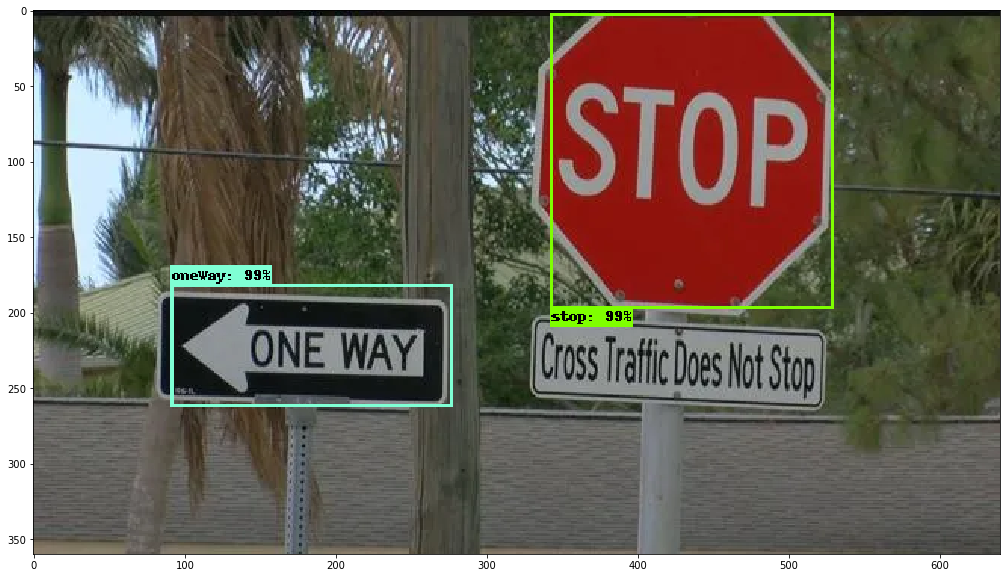

In [35]:
import cv2

image = cv2.imread(PATH_TO_IMAGE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image, axis=0)

(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=2,
    min_score_thresh=0.6)

plt.figure(figsize=(30,10))
plt.imshow(image)